# Machine Learning Prediction on MultiTarget Variable

In [1]:
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")


In [2]:
train_df=pd.read_csv(r'F:\GitHub2024\Data\train.csv')
train_target_df=pd.read_csv(r'F:\GitHub2024\Data\trainLabels.csv')


In [3]:
train_df.shape

(9999, 146)

In [4]:
train_df.head(5)  

,id,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x136,x137,x138,x139,x140,x141,x142,x143,x144,x145
0,1,NO,NO,dqOiM6yBYgnVSezBRiQXs9bvOFnRqrtIoXRIElxD7g8=,GNjrXXA3SxbgD0dTRblAPO9jFJ7AIaZnu/f48g5XSUk=,0.576561,0.073139,0.481394,0.115697,0.472474,...,0.0,0.810,3306,4676,YES,NO,YES,2,0.375535,0.464610
1,2,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.510,4678,3306,YES,NO,YES,4,0.741682,0.593630
2,3,NO,NO,ib4VpsEsqJHzDiyL0dZLQ+xQzDPrkxE+9T3mx5fv2wI=,X6dDAI/DZOWvu0Dg6gCgRoNr2vTUz/mc4SdHTNUPS38=,1.341803,0.051422,0.935572,0.041440,0.501710,...,0.0,0.850,4678,3306,NO,NO,NO,1,0.776467,0.493159
3,4,YES,NO,BfrqME7vdLw3suQp6YAT16W2piNUmpKhMzuDrVrFQ4w=,YGCdISifn4fLao/ASKdZFhGIq23oqzfSbUVb6px1pig=,0.653912,0.041471,0.940787,0.090851,0.556564,...,0.0,0.945,3306,4678,NO,NO,YES,3,0.168234,0.546582
4,5,NO,NO,RTjsrrR8DTlJyaIP9Q3Z8s0zseqlVQTrlSe97GCWfbk=,3yK2OPj1uYDsoMgsxsjY1FxXkOllD8Xfh20VYGqT+nU=,1.415919,0.000000,1.000000,0.000000,0.375297,...,0.0,1.000,1263,892,NO,NO,NO,1,0.246637,0.361045


In [5]:
train_target_df.head(5)

,id,y1,y2,y3,y4,y5,y6,y7,y8,y9,...,y24,y25,y26,y27,y28,y29,y30,y31,y32,y33
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,3,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Preprocessing the Data for ML

In [6]:
missing_percent_training_data=train_df.isna().sum().sort_values(ascending=False)*100/len(train_df)
missing_percent_training_data

x26     14.261426
x12     14.261426
x2      14.261426
x3      14.261426
x4      14.261426
          ...    
x53      0.000000
x52      0.000000
x51      0.000000
x50      0.000000
x145     0.000000
Length: 146, dtype: float64

In [7]:
missing_percent_train_target_data=train_target_df.isna().sum().sort_values(ascending=False)*100/len(train_target_df)
missing_percent_train_target_data

id     0.0
y25    0.0
y19    0.0
y20    0.0
y21    0.0
y22    0.0
y23    0.0
y24    0.0
y26    0.0
y1     0.0
y27    0.0
y28    0.0
y29    0.0
y30    0.0
y31    0.0
y32    0.0
y18    0.0
y17    0.0
y16    0.0
y15    0.0
y14    0.0
y13    0.0
y12    0.0
y11    0.0
y10    0.0
y9     0.0
y8     0.0
y7     0.0
y6     0.0
y5     0.0
y4     0.0
y3     0.0
y2     0.0
y33    0.0
dtype: float64

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Columns: 146 entries, id to x145
dtypes: float64(55), int64(31), object(60)
memory usage: 11.1+ MB


# Data Cleanning , Filling Missing Value

In [9]:
object_columns = train_df.select_dtypes(include=['object']).columns
train_df[object_columns] = train_df[object_columns].fillna('Not Available')


In [10]:
train_df.isna().sum().sort_values(ascending=False)

id      0
x109    0
x93     0
x94     0
x95     0
       ..
x49     0
x50     0
x51     0
x52     0
x145    0
Length: 146, dtype: int64

In [11]:
list_col = train_df.select_dtypes(include='object').columns
output_count = 0  # Counter for the number of outputs

for col in list_col:
    unique_values = train_df[col].unique()
    if len(unique_values) < 10:
        output_count += 1
        print('{}: {}'.format(col.upper(), unique_values))

print("Number of Column:", output_count)


X1: ['NO' 'Not Available' 'YES']
X2: ['NO' 'Not Available' 'YES']
X10: ['YES' 'Not Available' 'NO']
X11: ['NO' 'Not Available' 'YES']
X12: ['NO' 'Not Available' 'YES']
X13: ['NO' 'Not Available' 'YES']
X14: ['NO' 'Not Available' 'YES']
X24: ['YES' 'Not Available' 'NO']
X25: ['NO' 'Not Available' 'YES']
X26: ['YES' 'Not Available' 'NO']
X30: ['NO' 'YES']
X31: ['NO' 'YES']
X32: ['NO' 'YES' 'Not Available']
X33: ['NO' 'YES' 'Not Available']
X41: ['YES' 'NO' 'Not Available']
X42: ['NO' 'YES' 'Not Available']
X43: ['YES' 'NO' 'Not Available']
X44: ['NO' 'YES' 'Not Available']
X45: ['NO' 'YES' 'Not Available']
X55: ['YES' 'NO' 'Not Available']
X56: ['NO' 'YES' 'Not Available']
X57: ['YES' 'NO' 'Not Available']
X62: ['NO' 'YES' 'Not Available']
X63: ['NO' 'YES' 'Not Available']
X71: ['YES' 'NO' 'Not Available']
X72: ['NO' 'Not Available' 'YES']
X73: ['NO' 'YES' 'Not Available']
X74: ['NO' 'Not Available' 'YES']
X75: ['NO' 'YES' 'Not Available']
X85: ['YES' 'NO' 'Not Available']
X86: ['NO' 'YE

In [12]:
list_col = train_df.select_dtypes(include='object').columns
unique_values_dict = {}  # Dictionary to store unique values for each column

for col in list_col:
    unique_values = train_df[col].nunique()
    unique_values_dict[col] = unique_values

# Sort the dictionary by values in descending order
sorted_unique_values = sorted(unique_values_dict.items(), key=lambda x: x[1], reverse=True)

# Print the sorted unique values
for col, unique_count in sorted_unique_values:
    print('{}: {}'.format(col.upper(), unique_count))

total_unique_count = sum(unique_values_dict.values())
print("Total unique values across all columns:", total_unique_count)


X61: 7115
X64: 5678
X34: 5569
X3: 4752
X94: 4648
X91: 3396
X65: 1019
X35: 981
X95: 760
X4: 759
X1: 3
X2: 3
X10: 3
X11: 3
X12: 3
X13: 3
X14: 3
X24: 3
X25: 3
X26: 3
X32: 3
X33: 3
X41: 3
X42: 3
X43: 3
X44: 3
X45: 3
X55: 3
X56: 3
X57: 3
X62: 3
X63: 3
X71: 3
X72: 3
X73: 3
X74: 3
X75: 3
X85: 3
X86: 3
X87: 3
X92: 3
X93: 3
X101: 3
X102: 3
X103: 3
X104: 3
X105: 3
X115: 3
X116: 3
X117: 3
X30: 2
X31: 2
X126: 2
X127: 2
X128: 2
X129: 2
X130: 2
X140: 2
X141: 2
X142: 2
Total unique values across all columns: 34817


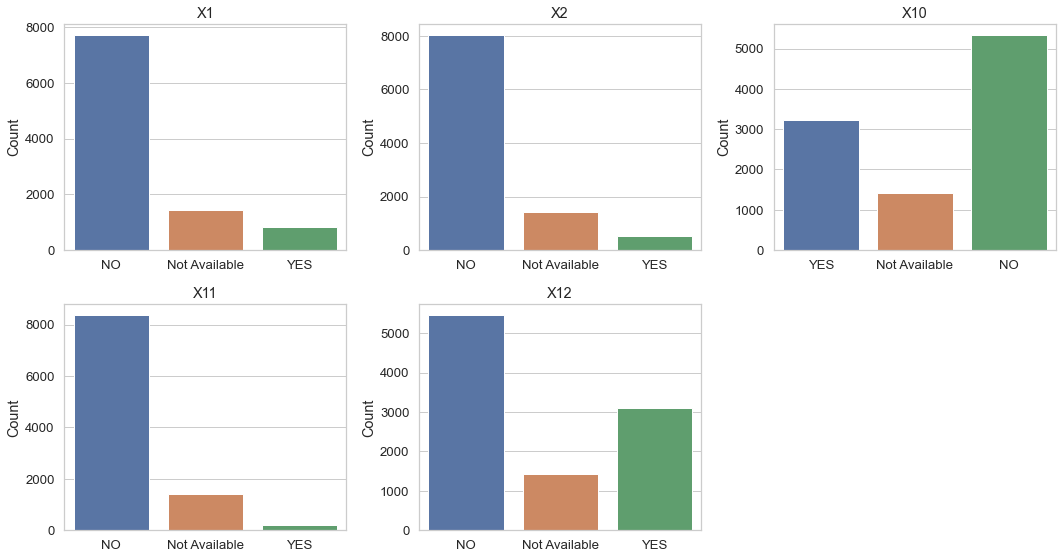

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Specify the columns you want to visualize
selected_cols = ['x1', 'x2', 'x10', 'x11', 'x12']  # Adjust column names as needed

# Set the number of columns for display
sns.set(style="whitegrid", font_scale=1.2)
num_cols_display = 3  # Adjust the number of columns as needed
num_rows = (len(selected_cols) - 1) // num_cols_display + 1

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols_display, figsize=(15, num_rows * 4))

# Flatten the axes if necessary
axes = axes.flatten()

# Plot count plots for selected columns
for i, col in enumerate(selected_cols):
    sns.countplot(data=train_df, x=col, ax=axes[i])
    axes[i].set_title(col.upper())
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")

# Hide empty subplots
for j in range(i + 1, num_rows * num_cols_display):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# Manual Encoding     Converting Categorical to Numerical

In [14]:
for col in train_df:
    train_df[col].replace({'YES':1, 'NO':0,'Not Available':2},inplace=True)

In [15]:
train_df.head()

,id,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x136,x137,x138,x139,x140,x141,x142,x143,x144,x145
0,1,0,0,dqOiM6yBYgnVSezBRiQXs9bvOFnRqrtIoXRIElxD7g8=,GNjrXXA3SxbgD0dTRblAPO9jFJ7AIaZnu/f48g5XSUk=,0.576561,0.073139,0.481394,0.115697,0.472474,...,0.0,0.810,3306,4676,1,0,1,2,0.375535,0.464610
1,2,2,2,2,2,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.510,4678,3306,1,0,1,4,0.741682,0.593630
2,3,0,0,ib4VpsEsqJHzDiyL0dZLQ+xQzDPrkxE+9T3mx5fv2wI=,X6dDAI/DZOWvu0Dg6gCgRoNr2vTUz/mc4SdHTNUPS38=,1.341803,0.051422,0.935572,0.041440,0.501710,...,0.0,0.850,4678,3306,0,0,0,1,0.776467,0.493159
3,4,1,0,BfrqME7vdLw3suQp6YAT16W2piNUmpKhMzuDrVrFQ4w=,YGCdISifn4fLao/ASKdZFhGIq23oqzfSbUVb6px1pig=,0.653912,0.041471,0.940787,0.090851,0.556564,...,0.0,0.945,3306,4678,0,0,1,3,0.168234,0.546582
4,5,0,0,RTjsrrR8DTlJyaIP9Q3Z8s0zseqlVQTrlSe97GCWfbk=,3yK2OPj1uYDsoMgsxsjY1FxXkOllD8Xfh20VYGqT+nU=,1.415919,0.000000,1.000000,0.000000,0.375297,...,0.0,1.000,1263,892,0,0,0,1,0.246637,0.361045


In [16]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Columns: 146 entries, id to x145
dtypes: float64(55), int64(81), object(10)
memory usage: 11.1+ MB


In [17]:
object_columns = train_df.select_dtypes(include='object').columns
print(object_columns)


Index(['x3', 'x4', 'x34', 'x35', 'x61', 'x64', 'x65', 'x91', 'x94', 'x95'], dtype='object')


# Drop Column which have High Unique Values 

In [18]:
train_df=train_df.drop(['id','x3', 'x4', 'x34', 'x35', 'x61', 'x64', 'x65', 'x91', 'x94', 'x95'], axis=1)

In [19]:
train_df

,x1,x2,x5,x6,x7,x8,x9,x10,x11,x12,...,x136,x137,x138,x139,x140,x141,x142,x143,x144,x145
0,0,0,0.576561,0.073139,0.481394,0.115697,0.472474,1,0,0,...,0.0,0.810,3306,4676,1,0,1,2,0.375535,0.464610
1,2,2,0.000000,0.000000,0.000000,0.000000,0.000000,2,2,2,...,0.0,0.510,4678,3306,1,0,1,4,0.741682,0.593630
2,0,0,1.341803,0.051422,0.935572,0.041440,0.501710,0,0,1,...,0.0,0.850,4678,3306,0,0,0,1,0.776467,0.493159
3,1,0,0.653912,0.041471,0.940787,0.090851,0.556564,1,0,0,...,0.0,0.945,3306,4678,0,0,1,3,0.168234,0.546582
4,0,0,1.415919,0.000000,1.000000,0.000000,0.375297,0,0,1,...,0.0,1.000,1263,892,0,0,0,1,0.246637,0.361045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,0,0,1.207136,0.082855,0.918960,0.313880,0.495189,0,0,0,...,0.0,0.810,4677,3307,1,0,1,1,0.502268,0.486637
9995,0,0,1.414798,0.000000,1.000000,0.000000,0.357369,1,0,0,...,0.0,1.000,1262,892,1,0,1,15,0.890135,0.346276
9996,1,1,1.413677,0.000000,1.000000,0.000000,0.668517,1,0,0,...,0.0,1.000,1261,892,1,0,1,5,0.726457,0.659001
9997,0,0,1.294118,0.000000,1.000000,0.000000,0.570707,0,0,0,...,1.0,1.000,1188,918,0,0,0,3,0.450980,0.561448


# Training the Model & Predicting the Classes

In [20]:
train_target_df.shape

(49999, 34)

In [21]:
train_df.shape

(9999, 135)

In [22]:
train_target_df=train_target_df.loc[:9998,'y1':]

# Train Test Split

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(train_df, train_target_df, test_size=0.2)


In [25]:
X_train.head(5)

,x1,x2,x5,x6,x7,x8,x9,x10,x11,x12,...,x136,x137,x138,x139,x140,x141,x142,x143,x144,x145
6347,0,0,0.954642,0.102510,0.280919,0.941639,0.674792,0,0,0,...,0.0,0.920000,4677,3307,0,0,0,0,0.152404,0.666025
5496,1,1,1.168482,0.453721,0.541440,1.156685,0.826627,1,0,1,...,0.0,0.890000,4672,3306,1,0,1,1,0.249244,0.818921
3179,0,0,0.909915,0.215538,0.945889,0.798368,0.620188,1,0,0,...,5.0,0.960000,4676,3308,1,0,1,2,0.823761,0.613345
9262,0,0,1.356624,0.128554,0.925590,0.083787,0.790081,0,0,0,...,0.0,0.753333,4678,3306,1,0,1,64,0.657895,0.703506
1046,0,0,0.824384,0.068229,0.881341,0.490062,0.532717,0,0,1,...,0.0,0.883333,4325,3371,1,0,1,3,0.277662,0.522775


In [26]:
Y_train.head(5)

,y1,y2,y3,y4,y5,y6,y7,y8,y9,y10,...,y24,y25,y26,y27,y28,y29,y30,y31,y32,y33
6347,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3179,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9262,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1046,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Algorithm

# # NaveBayes

In [27]:
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB

# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier1 = BinaryRelevance(classifier=GaussianNB())

# train
classifier1.fit(X_train.values, Y_train.values)

# predict
predictions1 = classifier1.predict(X_test.values)

# Confusion Matrix for Each Target Variable

In [28]:
from sklearn.metrics import multilabel_confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt

def calculate_confusion_matrices(predictions1, true_labels, threshold=0.5):
    # Convert sparse matrix to a dense NumPy array
    binary_predictions = (predictions1.toarray() >= threshold).astype(int)
    binary_true_labels = (true_labels >= threshold).astype(int)

    # Calculate confusion matrices for each label
    confusion_matrices = multilabel_confusion_matrix(binary_true_labels, binary_predictions)

    # Print confusion matrices
    for i, confusion_matrix in enumerate(confusion_matrices):
        print(f"Confusion Matrix for Label {i + 1}:\n", confusion_matrix)

    # Get unique class labels
    unique_labels = np.unique(binary_true_labels)


    return confusion_matrices

In [29]:
confusion_matrices = calculate_confusion_matrices(predictions1, Y_test.values)

Confusion Matrix for Label 1:
 [[1791  194]
 [   2   13]]
Confusion Matrix for Label 2:
 [[1952   47]
 [   1    0]]
Confusion Matrix for Label 3:
 [[1913   45]
 [   1   41]]
Confusion Matrix for Label 4:
 [[1961    6]
 [   3   30]]
Confusion Matrix for Label 5:
 [[1999    0]
 [   1    0]]
Confusion Matrix for Label 6:
 [[1563  293]
 [   7  137]]
Confusion Matrix for Label 7:
 [[1177  755]
 [   7   61]]
Confusion Matrix for Label 8:
 [[1976   23]
 [   1    0]]
Confusion Matrix for Label 9:
 [[1521  324]
 [  29  126]]
Confusion Matrix for Label 10:
 [[1588  384]
 [   9   19]]
Confusion Matrix for Label 11:
 [[1992    6]
 [   0    2]]
Confusion Matrix for Label 12:
 [[1570  292]
 [   8  130]]
Confusion Matrix for Label 13:
 [[1769  206]
 [   4   21]]
Confusion Matrix for Label 14:
 [[2000    0]
 [   0    0]]
Confusion Matrix for Label 15:
 [[1973   22]
 [   1    4]]
Confusion Matrix for Label 16:
 [[1809  166]
 [   2   23]]
Confusion Matrix for Label 17:
 [[2000    0]
 [   0    0]]
Confus

In [30]:
from sklearn.metrics import multilabel_confusion_matrix, classification_report

def calculate_reports(predictions1, true_labels, threshold=0.5):
    # Convert sparse matrix to a dense NumPy array
    binary_predictions = (predictions1.toarray() >= threshold).astype(int)
    binary_true_labels = (true_labels >= threshold).astype(int)

    # Calculate and print classification reports for each label
    classification_reports = []
    for i in range(binary_true_labels.shape[1]):
        class_report = classification_report(
            binary_true_labels[:, i], binary_predictions[:, i], labels=[0, 1],
            target_names=[f'Label {i+1}_0', f'Label {i+1}_1']
        )
        classification_reports.append(class_report)
        print(f"Classification Report for Label {i + 1}:\n", class_report)

    return confusion_matrices, classification_reports

# Classification Reports for Each Taret Variable

In [31]:
classification_reports = calculate_reports(predictions1, Y_test.values)

Classification Report for Label 1:
               precision    recall  f1-score   support

   Label 1_0       1.00      0.90      0.95      1985
   Label 1_1       0.06      0.87      0.12        15

    accuracy                           0.90      2000
   macro avg       0.53      0.88      0.53      2000
weighted avg       0.99      0.90      0.94      2000

Classification Report for Label 2:
               precision    recall  f1-score   support

   Label 2_0       1.00      0.98      0.99      1999
   Label 2_1       0.00      0.00      0.00         1

    accuracy                           0.98      2000
   macro avg       0.50      0.49      0.49      2000
weighted avg       1.00      0.98      0.99      2000

Classification Report for Label 3:
               precision    recall  f1-score   support

   Label 3_0       1.00      0.98      0.99      1958
   Label 3_1       0.48      0.98      0.64        42

    accuracy                           0.98      2000
   macro avg       0

               precision    recall  f1-score   support

  Label 28_0       1.00      0.70      0.82      1983
  Label 28_1       0.03      1.00      0.05        17

    accuracy                           0.70      2000
   macro avg       0.51      0.85      0.44      2000
weighted avg       0.99      0.70      0.81      2000

Classification Report for Label 29:
               precision    recall  f1-score   support

  Label 29_0       0.99      0.77      0.87      1935
  Label 29_1       0.11      0.86      0.20        65

    accuracy                           0.77      2000
   macro avg       0.55      0.81      0.53      2000
weighted avg       0.97      0.77      0.84      2000

Classification Report for Label 30:
               precision    recall  f1-score   support

  Label 30_0       1.00      0.89      0.94      1955
  Label 30_1       0.14      0.82      0.24        45

    accuracy                           0.89      2000
   macro avg       0.57      0.85      0.59      2000

# Try with another Algorithm to see if we can get better Results

# Decision TREE

In [32]:
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.tree import DecisionTreeClassifier

# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier2 = BinaryRelevance(classifier=DecisionTreeClassifier())

# train
classifier2.fit(X_train.values, Y_train.values)

# predict
predictions2 = classifier2.predict(X_test.values)

In [33]:
from sklearn.metrics import multilabel_confusion_matrix, classification_report

def calculate_confusion_matrices(predictions2, true_labels, threshold=0.5):
    # Convert sparse matrix to a dense NumPy array
    binary_predictions = (predictions2.toarray() >= threshold).astype(int)
    binary_true_labels = (true_labels >= threshold).astype(int)

    # Calculate confusion matrices for each label
    confusion_matrices = multilabel_confusion_matrix(binary_true_labels, binary_predictions)

    # Print confusion matrices
    for i, confusion_matrix in enumerate(confusion_matrices):
        print(f"Confusion Matrix for Label {i + 1}:\n", confusion_matrix)

    # Get unique class labels
    unique_labels = np.unique(binary_true_labels)


    return confusion_matrices

In [34]:
confusion_matrices = calculate_confusion_matrices(predictions2, Y_test.values)

Confusion Matrix for Label 1:
 [[1981    4]
 [   9    6]]
Confusion Matrix for Label 2:
 [[1999    0]
 [   0    1]]
Confusion Matrix for Label 3:
 [[1950    8]
 [   8   34]]
Confusion Matrix for Label 4:
 [[1963    4]
 [   6   27]]
Confusion Matrix for Label 5:
 [[1998    1]
 [   1    0]]
Confusion Matrix for Label 6:
 [[1795   61]
 [  30  114]]
Confusion Matrix for Label 7:
 [[1893   39]
 [  38   30]]
Confusion Matrix for Label 8:
 [[1997    2]
 [   1    0]]
Confusion Matrix for Label 9:
 [[1788   57]
 [  46  109]]
Confusion Matrix for Label 10:
 [[1956   16]
 [  17   11]]
Confusion Matrix for Label 11:
 [[1997    1]
 [   2    0]]
Confusion Matrix for Label 12:
 [[1799   63]
 [  41   97]]
Confusion Matrix for Label 13:
 [[1960   15]
 [  14   11]]
Confusion Matrix for Label 14:
 [[2000    0]
 [   0    0]]
Confusion Matrix for Label 15:
 [[1989    6]
 [   4    1]]
Confusion Matrix for Label 16:
 [[1965   10]
 [  15   10]]
Confusion Matrix for Label 17:
 [[2000    0]
 [   0    0]]
Confus

# ''Nave Bayes Model'' have Better Results than ''Decision Tree model ''

# Test File 

In [35]:
#Read Test file for which prediction have to be submitted

In [36]:
Live_test=pd.read_csv(r'F:\GitHub2024\Data\test.csv')


In [37]:
Live_test.head(5)

,1698001,NO,NO.1,5KaYd5siHnBD/IjH8BF1fPz5zrCADHZia/Lrhlyxkvc=,FzMc/XY2ETaomhy8gPc9UL8LRkEnQA56+/wVF1fogk8=,1.41479820627803,0,1,0.1,0.202060221870048,...,0.30,1.8,1262.3,892.3,NO.36,NO.37,NO.38,0.31,0.0896860986547085,0.193343898573693.1
0,1698002,NO,NO,9ACcuXc7MMm9V7jZSr3P3VxAKyMvLAtsdwPKwgncc+k=,WV5vAHFyqkeuyFB5KVNGFOBuwjkUGKYc8wh9QfpVzAA=,0.832679,0.049834,0.945938,0.317427,0.482021,...,1.0,0.866667,4672,3311,NO,NO,NO,5,0.945032,0.471318
1,1698003,NO,NO,MeBJ/ZzEIXfNKat4w1oeDxiMNKrAeY0PH41i00hpYDo=,tnLDGLnpYhzsik5+X+WPo4KQJoQA0TfWRlmEtQ3XNJQ=,1.415919,0.000000,1.000000,0.000000,0.703088,...,-1.0,1.000000,1263,892,NO,NO,NO,8,0.557175,0.693587
2,1698004,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.870000,4672,3306,YES,NO,YES,0,0.870538,0.405822
3,1698005,NO,NO,uduY7XWJ8eFgTltv5P0rPh5GW6KwBu+tPFH13uQRN+0=,0L7+hNDV8S57etySgdljbm2AK1zQuLP77lGk2hyEmCo=,1.129212,0.087020,0.814240,1.112804,0.874318,...,0.0,0.870000,4400,3413,YES,NO,YES,2,0.224729,0.870909
4,1698006,NO,NO,kM4KU87XvnvKRvf4dN3Tu4zQYq8fpcqhDTFADWdfCg8=,4LhhvTzxwvh2SnFtcpaRasyvph66a3YDIQCshAfyS2o=,1.415919,0.000000,1.000000,0.000000,0.232779,...,0.0,1.000000,1263,892,YES,NO,YES,6,0.536996,0.223278


In [38]:
# Naming Columns

In [39]:
Live_test.columns=['id',
                 'x1','x2','x3','x4','x5','x6','x7','x8','x9','x10',
                 'x11','x12','x13','x14','x15','x16','x17','x18','x19','x20',
                 'x21','x22','x23','x24','x25','x26','x27','x28','x29','x30',
                 'x31','x32','x33','x34','x35','x36','x37','x38','x39','x40',
                 'x41','x42','x43','x44','x45','x46','x47','x48','x49','x50',
                 'x51','x52','x53','x54','x55','x56','x57','x58','x59','x60',
                 'x61','x62','x63','x64','x65','x66','x67','x68','x69','x70',
                 'x71','x72','x73','x74','x75','x76','x77','x78','x79','x80',
                 'x81','x82','x83','x84','x85','x86','x87','x88','x89','x90',
                 'x91','x92','x93','x94','x95','x96','x97','x98','x99','x100',
                 'x101','x102','x103','x104','x105','x106','x107','x108','x109','x110',
                 'x111','x112','x113','x114','x115','x116','x117','x118','x119','x120',
                 'x121','x122','x123','x124','x125','x126','x127','x128','x129','x130',
                 'x131','x132','x133','x134','x135','x136','x137','x138','x139','x140',
                 'x141','x142','x143','x144','x145']

In [40]:
Live_test.head(5)

,id,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x136,x137,x138,x139,x140,x141,x142,x143,x144,x145
0,1698002,NO,NO,9ACcuXc7MMm9V7jZSr3P3VxAKyMvLAtsdwPKwgncc+k=,WV5vAHFyqkeuyFB5KVNGFOBuwjkUGKYc8wh9QfpVzAA=,0.832679,0.049834,0.945938,0.317427,0.482021,...,1.0,0.866667,4672,3311,NO,NO,NO,5,0.945032,0.471318
1,1698003,NO,NO,MeBJ/ZzEIXfNKat4w1oeDxiMNKrAeY0PH41i00hpYDo=,tnLDGLnpYhzsik5+X+WPo4KQJoQA0TfWRlmEtQ3XNJQ=,1.415919,0.000000,1.000000,0.000000,0.703088,...,-1.0,1.000000,1263,892,NO,NO,NO,8,0.557175,0.693587
2,1698004,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.870000,4672,3306,YES,NO,YES,0,0.870538,0.405822
3,1698005,NO,NO,uduY7XWJ8eFgTltv5P0rPh5GW6KwBu+tPFH13uQRN+0=,0L7+hNDV8S57etySgdljbm2AK1zQuLP77lGk2hyEmCo=,1.129212,0.087020,0.814240,1.112804,0.874318,...,0.0,0.870000,4400,3413,YES,NO,YES,2,0.224729,0.870909
4,1698006,NO,NO,kM4KU87XvnvKRvf4dN3Tu4zQYq8fpcqhDTFADWdfCg8=,4LhhvTzxwvh2SnFtcpaRasyvph66a3YDIQCshAfyS2o=,1.415919,0.000000,1.000000,0.000000,0.232779,...,0.0,1.000000,1263,892,YES,NO,YES,6,0.536996,0.223278


# Preprocessing the Data for ML

In [41]:
missing_percent_Live_test_data=Live_test.isna().sum().sort_values(ascending=False)*100/len(Live_test)
missing_percent_Live_test_data

x26     14.707354
x12     14.707354
x2      14.707354
x3      14.707354
x4      14.707354
          ...    
x53      0.000000
x52      0.000000
x51      0.000000
x50      0.000000
x145     0.000000
Length: 146, dtype: float64

In [42]:
# Missing Value filled with Not Available
object_columns = Live_test.select_dtypes(include=['object']).columns
Live_test[object_columns] = Live_test[object_columns].fillna('Not Available')


In [43]:
list_col = Live_test.select_dtypes(include='object').columns
output_count = 0  # Counter for the number of outputs

for col in list_col:
    unique_values = Live_test[col].unique()
    if len(unique_values) < 10:
        output_count += 1
        print('{}: {}'.format(col.upper(), unique_values))

print("Number of Column:", output_count)


X1: ['NO' 'Not Available' 'YES']
X2: ['NO' 'Not Available' 'YES']
X10: ['YES' 'NO' 'Not Available']
X11: ['NO' 'Not Available' 'YES']
X12: ['NO' 'YES' 'Not Available']
X13: ['NO' 'YES' 'Not Available']
X14: ['NO' 'YES' 'Not Available']
X24: ['YES' 'NO' 'Not Available']
X25: ['NO' 'Not Available' 'YES']
X26: ['YES' 'NO' 'Not Available']
X30: ['NO' 'YES']
X31: ['NO' 'YES']
X32: ['NO' 'Not Available' 'YES']
X33: ['NO' 'Not Available' 'YES']
X41: ['NO' 'YES' 'Not Available']
X42: ['NO' 'Not Available' 'YES']
X43: ['YES' 'NO' 'Not Available']
X44: ['NO' 'Not Available' 'YES']
X45: ['NO' 'YES' 'Not Available']
X55: ['NO' 'YES' 'Not Available']
X56: ['NO' 'Not Available' 'YES']
X57: ['NO' 'YES' 'Not Available']
X62: ['NO' 'YES' 'Not Available']
X63: ['NO' 'YES' 'Not Available']
X71: ['YES' 'NO' 'Not Available']
X72: ['NO' 'Not Available' 'YES']
X73: ['NO' 'YES' 'Not Available']
X74: ['NO' 'YES' 'Not Available']
X75: ['NO' 'YES' 'Not Available']
X85: ['YES' 'NO' 'Not Available']
X86: ['NO' 'No

In [44]:
list_col = Live_test.select_dtypes(include='object').columns
unique_values_dict = {}  # Dictionary to store unique values for each column

for col in list_col:
    unique_values = Live_test[col].nunique()
    unique_values_dict[col] = unique_values

# Sort the dictionary by values in descending order
sorted_unique_values = sorted(unique_values_dict.items(), key=lambda x: x[1], reverse=True)

# Print the sorted unique values
for col, unique_count in sorted_unique_values:
    print('{}: {}'.format(col.upper(), unique_count))

total_unique_count = sum(unique_values_dict.values())
print("Total unique values across all columns:", total_unique_count)


X61: 1626
X34: 1456
X64: 1455
X94: 1298
X3: 1237
X91: 921
X65: 381
X35: 358
X95: 296
X4: 281
X1: 3
X2: 3
X10: 3
X11: 3
X12: 3
X13: 3
X14: 3
X24: 3
X25: 3
X26: 3
X32: 3
X33: 3
X41: 3
X42: 3
X43: 3
X44: 3
X45: 3
X55: 3
X56: 3
X57: 3
X62: 3
X63: 3
X71: 3
X72: 3
X73: 3
X74: 3
X75: 3
X85: 3
X86: 3
X87: 3
X92: 3
X93: 3
X101: 3
X102: 3
X103: 3
X104: 3
X105: 3
X115: 3
X116: 3
X117: 3
X30: 2
X31: 2
X126: 2
X127: 2
X128: 2
X129: 2
X130: 2
X140: 2
X141: 2
X142: 2
Total unique values across all columns: 9449


In [45]:
for col in Live_test:
    Live_test[col].replace({'YES':1, 'NO':0,'Not Available':2},inplace=True)

In [46]:
Live_test1=Live_test

In [47]:
Live_test=Live_test.drop(['id','x3', 'x4', 'x34', 'x35', 'x61', 'x64', 'x65', 'x91', 'x94', 'x95'], axis=1)

In [48]:
Live_test.head(5)

,x1,x2,x5,x6,x7,x8,x9,x10,x11,x12,...,x136,x137,x138,x139,x140,x141,x142,x143,x144,x145
0,0,0,0.832679,0.049834,0.945938,0.317427,0.482021,1,0,0,...,1.0,0.866667,4672,3311,0,0,0,5,0.945032,0.471318
1,0,0,1.415919,0.000000,1.000000,0.000000,0.703088,0,0,1,...,-1.0,1.000000,1263,892,0,0,0,8,0.557175,0.693587
2,2,2,0.000000,0.000000,0.000000,0.000000,0.000000,2,2,2,...,0.0,0.870000,4672,3306,1,0,1,0,0.870538,0.405822
3,0,0,1.129212,0.087020,0.814240,1.112804,0.874318,0,0,0,...,0.0,0.870000,4400,3413,1,0,1,2,0.224729,0.870909
4,0,0,1.415919,0.000000,1.000000,0.000000,0.232779,0,0,1,...,0.0,1.000000,1263,892,1,0,1,6,0.536996,0.223278


# Prediction with NaveBayes Model

In [49]:
predictions_Live = classifier1.predict(Live_test.values)

In [50]:
predictions_Live

<1999x33 sparse matrix of type '<class 'numpy.int64'>'
	with 8652 stored elements in Compressed Sparse Column format>

In [51]:
predictions_Live_arr=predictions_Live.toarray()

In [52]:
Live_test1.id

0       1698002
1       1698003
2       1698004
3       1698005
4       1698006
         ...   
1994    1699996
1995    1699997
1996    1699998
1997    1699999
1998    1700000
Name: id, Length: 1999, dtype: int64

In [53]:
target=[]
for num in Live_test1.id:
    for i in range(1,34):
        target.append(str(num)+'_y'+str(i))

In [54]:
len(target)

65967

In [55]:
submission_df=pd.DataFrame(target,columns=['id_label'])

In [56]:
submission_df

,id_label
0,1698002_y1
1,1698002_y2
2,1698002_y3
3,1698002_y4
4,1698002_y5
...,...
65962,1700000_y29
65963,1700000_y30
65964,1700000_y31
65965,1700000_y32


In [57]:
prediction_list=[]
for i in range(len(predictions_Live_arr)):
    prediction_list.extend(predictions_Live_arr.tolist()[i])

In [58]:
pred_df=pd.DataFrame(prediction_list,columns=['pred'])

In [59]:
test_prediction_df=pd.concat([submission_df,pred_df],axis=1)

In [60]:
test_prediction_df

,id_label,pred
0,1698002_y1,0
1,1698002_y2,0
2,1698002_y3,0
3,1698002_y4,0
4,1698002_y5,0
...,...,...
65962,1700000_y29,0
65963,1700000_y30,0
65964,1700000_y31,0
65965,1700000_y32,0


# Save the Output in csv

In [ ]:
test_prediction_df.to_csv('test_prediction.csv', index=None)
